

**In this tutorial, you’ll learn how to:**

**Calculate metrics about your data<br>
Perform basic queries and aggregations<br>
Discover and handle incorrect data, inconsistencies, and missing values <br>
Visualize your data with plots**


# Using the Pandas Python Library
Now you can use the Pandas Python library to take a look at your data:

In [ ]:
import pandas as pd 

In [2]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv" #url for the csv file

In [3]:
df = pd.read_csv(url)

You can have a look at the first five rows with .head():

In [4]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


You can have a look at the type of the data with .type():

In [5]:
type(df)

pandas.core.frame.DataFrame

Unless your screen is quite large, your output probably won’t display all 23 columns. Somewhere in the middle, you’ll see a column of ellipses (...) indicating the missing data. If you’re working in a terminal, then that’s probably more readable than wrapping long rows. However, Jupyter notebooks will allow you to scroll. You can configure Pandas to display all 23 columns like this:

In [75]:
pd.set_option("display.max.columns", None)
df

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [7]:
pd.set_option("display.precision", 2)

In [8]:
df.head() #its df.head(n) n= number of rows you want to see

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


# Getting to Know Your Data


## Displaying Data Types
You can display all columns and their data types with .info():

In [9]:
#know your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

## Showing Basics Statistics
Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with .describe():


In [10]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


# Explore your data
**Exploratory data analysis (EDA)** can help you answer questions about your dataset.


In [11]:

df.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

you can examine how often specific values occur in a column: using value_counts()


In [12]:
df['team_id'].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
DTF      60
TRH      60
PIT      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [13]:
df['fran_id'].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. Find out who the other "Lakers" team is:



In [14]:
df.loc[df['fran_id']=="Lakers","team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

You can even find out when they played those games:


In [15]:
df.loc[df["team_id"]=="MNL","date_game"].min()

'1/1/1949'

In [16]:
df.loc[df["team_id"]=="MNL","date_game"].max()

'4/9/1959'

In [17]:
df.loc[df["team_id"]=="MNL","date_game"].agg(("min","max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

# Getting to Know Pandas’ Data Structures

## Understanding Series Objects

In [19]:
revenue = pd.Series([25678,123421,3419]) #pd.Series(any_list)

In [20]:
new_revenue_list =list(revenue)
new_revenue_list

[25678, 123421, 3419]

In [21]:
city_revenue = pd.Series(new_revenue_list,index=["Amsterdam","Toronto","Tokyo"])

In [22]:
city_revenue

Amsterdam     25678
Toronto      123421
Tokyo          3419
dtype: int64

In [23]:
city_revenue.keys()

Index(['Amsterdam', 'Toronto', 'Tokyo'], dtype='object')

# Understanding DataFrame Objects

In [25]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8,"Toronto":7})
city_employee_count

Amsterdam    5
Tokyo        8
Toronto      7
dtype: int64

In [26]:
city_data = pd.DataFrame({"revenue":city_revenue,"employe_count":city_employee_count})

In [27]:
city_data

,revenue,employe_count
Amsterdam,25678,5
Tokyo,3419,8
Toronto,123421,7


In [28]:
city_data.values

array([[ 25678,      5],
       [  3419,      8],
       [123421,      7]], dtype=int64)

In [29]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [30]:
#Accessing Series Elements

In [31]:
city_revenue['Toronto']

123421

In [32]:
city_revenue["Toronto":]

Toronto    123421
Tokyo        3419
dtype: int64

In [33]:
city_revenue[1:]

Toronto    123421
Tokyo        3419
dtype: int64

In [34]:
#Using .loc and .iloc
color_names = ["red" ,"purple","blue","green","yellow"]
colors = pd.Series(color_names,index=[1,2,3,4,5])

In [35]:
colors

1       red
2    purple
3      blue
4     green
5    yellow
dtype: object

# Accessing Series Elements

In [36]:
#.loc refers to the label index.
#.iloc refers to the positional index.
colors.loc[1]

'red'

In [37]:
colors.iloc[1]

'purple'

In [38]:
#Querying Your Dataset

current_decade = df[df['year_id'] > 2010]
current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.36,1543.16,45.14,BOS,Celtics,88,1625.10,1629.30,A,L,0.26,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.10,1629.30,53.75,MIA,Heat,80,1547.36,1543.16,H,W,0.74,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.20,1502.60,40.90,LAL,Lakers,112,1647.60,1649.20,A,L,0.20,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.60,1649.20,55.61,HOU,Rockets,110,1504.20,1502.60,H,W,0.80,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.02,1630.62,53.88,POR,Trailblazers,106,1552.81,1565.22,A,L,0.49,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


In [39]:
current_decade.shape

(12658, 23)

In [40]:
#You can also select the rows where a specific field is not null:
games_notes = df[df["notes"].notnull()]
games_notes["notes"]

930            at Baltimore's Fifth Regiment Armory
931            at Baltimore's Fifth Regiment Armory
1084                                     Tiebreaker
1085                                     Tiebreaker
1088                                     Tiebreaker
                            ...                    
122207                           at London, England
123916    at Mexico City Arena, Mexico City, Mexico
123917    at Mexico City Arena, Mexico City, Mexico
124862                   at The O2, London, England
124863                   at The O2, London, England
Name: notes, Length: 5424, dtype: object

In [41]:
#Grouping and Aggregating Your Data

city_revenue.sum()

152518

In [42]:
city_revenue.max()

123421

In [43]:
city_revenue.mean()

50839.333333333336

In [44]:
df.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [45]:
df[(df["fran_id"]=="Spurs")&(df["year_id"]>2010)].groupby(["year_id","game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [46]:
#Manipulating Columns
nba = df.copy()
nba.shape

(126314, 23)

In [47]:
#You can define new columns based on the existing ones:
nba["difference"] = df.pts-df.opp_pts

In [48]:
nba.shape

(126314, 24)

In [49]:
#rename the coloumn name
rename_df = df.rename(
columns={"game_result": "result", "game_location": "location"})

In [50]:

rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [51]:
nba.shape

(126314, 24)

In [52]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
nba.drop(elo_columns, inplace=True, axis=1)

In [53]:
nba.shape

(126314, 20)

In [54]:
#Cleaning Data
        #Missing Values


In [55]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,40.29,NYK,Knicks,68,H,L,0.64,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,41.71,TRH,Huskies,66,A,W,0.36,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,42.01,NYK,Knicks,47,H,W,0.63,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,40.69,CHS,Stags,63,A,L,0.37,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,38.86,WSC,Capitols,50,H,L,0.64,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,60.31,GSW,Warriors,103,H,L,0.55,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,68.01,CLE,Cavaliers,91,H,W,0.77,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,60.01,GSW,Warriors,104,A,L,0.23,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,59.29,GSW,Warriors,105,H,L,0.48,NaN,-8


In [56]:
rows_without_missing_data = nba.dropna()

In [57]:
rows_without_missing_data.shape

(5424, 20)

In [58]:
data_without_missing_columns = nba.dropna(axis=1) # 0 = rows : 1 = coloums

In [59]:
data_without_missing_columns.shape

(126314, 19)

In [60]:
#If there’s a meaningful default value for your use case, then you can also replace the missing values with that:
data_with_default_notes = nba.copy()

In [61]:
data_with_default_notes["notes"].fillna(
...     value="no notes at all",
...     inplace=True
... )

In [62]:
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [63]:
#Visualizing Your Pandas DataFrame

In [64]:
%matplotlib inline

In [69]:
nba["fran_id"]

0           Huskies
1            Knicks
2             Stags
3            Knicks
4           Falcons
            ...    
126309    Cavaliers
126310     Warriors
126311    Cavaliers
126312    Cavaliers
126313     Warriors
Name: fran_id, Length: 126314, dtype: object

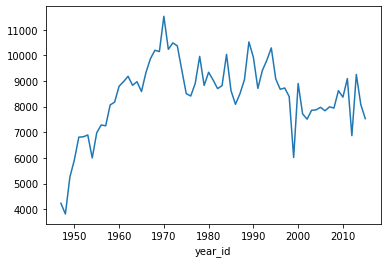

In [68]:
nba[nba["fran_id"]=="Knicks"].groupby("year_id")["pts"].sum().plot()

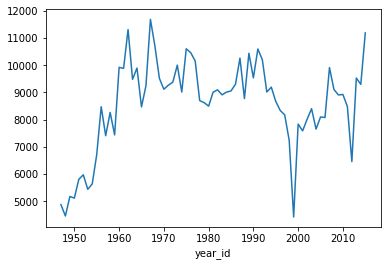

In [70]:
nba[nba["fran_id"]=="Warriors"].groupby("year_id")["pts"].sum().plot()

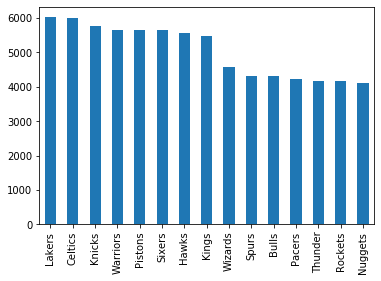

In [73]:
nba["fran_id"].value_counts().head(15).plot(kind="bar")

**Reference :https://realpython.com/pandas-python-explore-dataset/**